In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [182]:
data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train.csv', index_col ='match_id_hash')
target = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\train_targets.csv', index_col = 'match_id_hash')
y = target['radiant_win']
y = y.apply(lambda x: int(x)).values
data.head()

,r_kills,r_deaths,r_assists,r_denies,r_gold,r_lh,r_xp,r_max_mana,r_stuns,r_creeps_stacked,...,log_d_denies,log_d_gold,log_d_lh,log_d_xp,log_d_max_mana,log_d_creeps_stacked,log_d_camps_stacked,log_d_rune_pickups,log_d_sen_placed,log_chat_len
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,0,1,0,4,2037,25,1991,1490.68891,0.000000,0,...,3.091042,8.281471,3.526361,8.034631,7.574912,0.693147,0.693147,2.197225,0.693147,2.564949
b9c57c450ce74a2af79c9ce96fac144d,16,4,14,28,18172,127,17566,2414.68981,42.060296,2,...,2.890372,9.483873,4.584967,9.467073,7.707373,1.609438,1.386294,2.772589,1.386294,2.484907
6db558535151ea18ca70a6892197db41,0,0,0,0,880,0,0,1670.68912,0.000000,0,...,0.693147,6.177944,0.693147,0.693147,7.370664,0.693147,0.693147,1.098612,0.693147,0.693147
46a0ddce8f7ed2a8d9bd5edcbb925682,6,2,8,43,13348,131,14663,2474.68982,11.397237,0,...,2.639057,9.332823,5.049856,9.379661,7.651923,2.079442,1.386294,2.564949,0.693147,1.791759
b1b35ff97723d9b7ade1c9c3cf48f770,2,4,3,0,8079,62,9762,2364.68977,15.262940,0,...,2.564949,9.124674,4.634729,9.288042,7.581051,1.386294,1.098612,2.302585,0.693147,1.609438


In [183]:
data.columns



Index(['r_kills', 'r_deaths', 'r_assists', 'r_denies', 'r_gold', 'r_lh',
       'r_xp', 'r_max_mana', 'r_stuns', 'r_creeps_stacked', 'r_camps_stacked',
       'r_rune_pickups', 'r_firstblood_claimed', 'r_towers_killed',
       'r_roshans_killed', 'r_obs_placed', 'r_sen_placed', 'd_kills',
       'd_deaths', 'd_assists', 'd_denies', 'd_gold', 'd_lh', 'd_xp',
       'd_max_mana', 'd_stuns', 'd_creeps_stacked', 'd_camps_stacked',
       'd_rune_pickups', 'd_firstblood_claimed', 'd_towers_killed',
       'd_roshans_killed', 'd_obs_placed', 'd_sen_placed', 'd_dead', 'r_dead',
       'd_health_avg', 'r_health_avg', 'r_in_d_base', 'd_in_r_base',
       'd_avg_level', 'd_min_level', 'd_max_level', 'r_avg_level',
       'r_min_level', 'r_max_level', 'game_mode_2', 'game_mode_3',
       'game_mode_4', 'game_mode_5', 'game_mode_12', 'game_mode_16',
       'game_mode_22', 'game_mode_23', 'game_time', 'lobby_type',
       'objectives_len', 'chat_len', 'log_r_kills', 'log_r_deaths',
       'log_r_as

In [184]:
# determine the columns of the numerical data for further normalization
numerical = [
    'r_kills','r_deaths', 'r_assists', 'r_denies', 'r_gold', 'r_lh', 'r_xp', 'r_max_mana', 'r_stuns', 'r_creeps_stacked',
    'r_camps_stacked','r_rune_pickups','r_towers_killed', 'r_roshans_killed', 'r_obs_placed','r_sen_placed',
    
    'd_kills','d_deaths', 'd_assists', 'd_denies', 'd_gold', 'd_lh', 'd_xp', 'd_max_mana', 'd_stuns', 'd_creeps_stacked',
    'd_camps_stacked','d_rune_pickups','d_towers_killed', 'd_roshans_killed', 'd_obs_placed', 'd_sen_placed',
    
    'd_dead', 'r_dead', 'd_health_avg', 'r_health_avg',
    'd_avg_level', 'd_min_level', 'd_max_level', 
    'r_avg_level', 'r_min_level', 'r_max_level',
    'objectives_len', 'chat_len','log_r_kills', 'log_r_deaths',
    'log_r_assists', 'log_r_denies', 'log_r_gold', 'log_r_lh', 'log_r_xp',
       'log_r_max_mana', 'log_r_creeps_stacked', 'log_r_camps_stacked',
       'log_r_rune_pickups', 'log_r_sen_placed', 'log_d_kills', 'log_d_deaths',
       'log_d_assists', 'log_d_denies', 'log_d_gold', 'log_d_lh', 'log_d_xp',
       'log_d_max_mana', 'log_d_creeps_stacked', 'log_d_camps_stacked',
       'log_d_rune_pickups', 'log_d_sen_placed', 'log_chat_len'
          ]
numerical_columns =[]
for j in range(len(data.columns)):
    if data.columns[j] in numerical:
        numerical_columns.append(j)

In [185]:
from sklearn.model_selection import train_test_split

X = data.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=150)

In [186]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[:,numerical_columns] = scaler.fit_transform(X_train[:,numerical_columns])
X_test[:,numerical_columns] = scaler.transform(X_test[:,numerical_columns])


In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


logreg = LogisticRegression(C = 1,penalty = 'l2'  ).fit(X_train,y_train)

score1 = logreg.score(X_test, y_test)
y_pred = logreg.predict_proba(X_test)[:,1]

score2 = roc_auc_score(y_test, y_pred)

print('First baseline:')
print('score', score1)

print('roc_auc', score2)


First baseline:
score 0.7330084852558179
roc_auc 0.8211254625862374


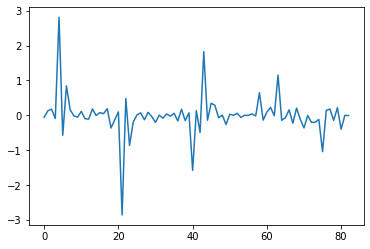

In [188]:
c = logreg.coef_
plt.plot(c[0])

In [189]:
test_data = data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_test.csv', index_col ='match_id_hash')

In [190]:
test_data.shape

(10000, 83)

In [191]:
X_sub = test_data.values
X_sub[:,numerical_columns] = scaler.transform(X_sub[:,numerical_columns])

In [192]:
y_test_pred = logreg.predict_proba(X_sub)[:, 1]

In [193]:
y_test_pred

array([0.50693244, 0.9650535 , 0.94685722, ..., 0.41246145, 0.73246158,
       0.10711106])

In [194]:
y_test_pred = logreg.predict_proba(X_sub)[:, 1]

df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred}, 
                                 index=test_data.index)

In [195]:
import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

Submission saved to submission_2019-11-07_00-13-36.csv


In [196]:
df_submission.head()


,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.506932
70e5ba30f367cea48793b9003fab9d38,0.965054
4d9ef74d3a2025d79e9423105fd73d41,0.946857
2bb79e0c1eaac1608e5a09c8e0c6a555,0.722896
bec17f099b01d67edc82dfb5ce735a43,0.457699


In [176]:
df_submission.shape

(10000, 1)